# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

In [17]:
# Create dataframe from cities
cities_df = pd.DataFrame({'City':cities})

cities_df["Cloudiness"] = np.NaN
cities_df["Country"] = np.NaN
cities_df["Date"] = ""
cities_df["Humidity"] = np.NaN
cities_df["Lat"] = np.NaN
cities_df["Lng"] = np.NaN
cities_df["Max Temp"] = np.NaN
cities_df["Wind Speed"] = np.NaN
cities_df = cities_df.head(30)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# Create settings dictionary with information we're interested in
#settings = {"units": "metric", "appid": api_key}
url = "http://api.openweathermap.org/data/2.5/"
weather = "weather?"
# Imperial uses Fahrenheit, miles/hour; Time of data calculation, unix, UTC 
units = "units=Imperial"
record_number = 1
    
print("Beginning Data Retrieval")
print("------------------------------")
# Loop through the cities_test_df

for index, row in cities_df.iterrows():
    city = row['City']

    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    # make request
    response = requests.get(url + weather + units + "&APPID=" + api_key + "&q=" + city)

    print(f"Processing Record {record_number} of Set 1 | {city}")
    # print the responses
    print(response.url)
    record_number += 1
     
    # convert to json
    response = response.json()

    #cities_copy_df = cities_df.copy()
    
    try:
    #if response['cod'] == 200:
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
    except KeyError:
        cities_df.loc[index, 'City'] = np.NaN
        print(f"{city} returned no results. Skipping...")
    pass

print("------------------------------")
print("Done")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=hermanus
Processing Record 2 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=busselton
Processing Record 3 of Set 1 | yaan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=yaan
Processing Record 4 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=rikitea
Processing Record 5 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=punta%20arenas
Processing Record 6 of Set 1 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=mahebourg
Processing Record 7 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Output File (CSV)
cities_df.to_csv("output_data/cities.csv")

In [20]:
#Use .count() to see if there's missing information
cities_df.count()

City          27
Cloudiness    27
Country       27
Date          30
Humidity      27
Lat           27
Lng           27
Max Temp      27
Wind Speed    27
dtype: int64

In [7]:
# Use infer_objects to set data type
#cities_df = cities_df.infer_objects()
# Drop empty rows
#clean_df = cities_df.dropna()
#clean_df.head(50)

In [21]:
cities_df.dtypes

City           object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [22]:
#clean_df = cities_df.infer_objects()
#clean_df.dtypes
cities_df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,8.0,ZA,1537481556,93.0,-34.42,19.24,34.77,3.13
1,busselton,48.0,AU,1537481558,100.0,-33.64,115.35,54.57,4.03
2,yaan,56.0,NG,1537481559,79.0,7.38,8.57,79.59,4.92
3,rikitea,68.0,PF,1537481560,100.0,-23.12,-134.97,72.66,13.53
4,punta arenas,40.0,CL,1537477200,91.0,-53.16,-70.91,39.20,11.41
5,mahebourg,75.0,MU,1537477200,73.0,-20.41,57.70,71.60,3.36
6,albany,90.0,US,1537480440,67.0,42.65,-73.75,69.08,6.93
7,balakhninskiy,8.0,RU,1537481565,89.0,58.01,114.28,28.02,3.91
8,avarua,40.0,CK,1537477200,57.0,-21.21,-159.78,78.80,19.46
9,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


In [23]:
clean_df = cities_df.dropna()
clean_df.head(50)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,8.0,ZA,1537481556,93.0,-34.42,19.24,34.77,3.13
1,busselton,48.0,AU,1537481558,100.0,-33.64,115.35,54.57,4.03
2,yaan,56.0,NG,1537481559,79.0,7.38,8.57,79.59,4.92
3,rikitea,68.0,PF,1537481560,100.0,-23.12,-134.97,72.66,13.53
4,punta arenas,40.0,CL,1537477200,91.0,-53.16,-70.91,39.20,11.41
5,mahebourg,75.0,MU,1537477200,73.0,-20.41,57.70,71.60,3.36
6,albany,90.0,US,1537480440,67.0,42.65,-73.75,69.08,6.93
7,balakhninskiy,8.0,RU,1537481565,89.0,58.01,114.28,28.02,3.91
8,avarua,40.0,CK,1537477200,57.0,-21.21,-159.78,78.80,19.46
10,manavalakurichi,40.0,IN,1537480800,94.0,8.13,77.30,77.00,5.82


In [ ]:
#cols = cities_df.columns[cities_df['Cloudiness', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']]
#cols
#cities_df[cols] = cities_df[cols].apply(pd.to_numeric, errors='coerce', axis=0)
#cities_df.dtypes

In [38]:
# Set date to mm/dd/yyyy
date = clean_df.loc[index, 'Date']
date

Timestamp('2018-09-20 22:00:00')

In [39]:
date = date.strftime('%m/%d/%Y')
date

'09/20/2018'

In [11]:
# Output File (CSV)
clean_df.to_csv("output_data/clean.csv")

In [24]:
clean_df.count()

City          27
Cloudiness    27
Country       27
Date          27
Humidity      27
Lat           27
Lng           27
Max Temp      27
Wind Speed    27
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

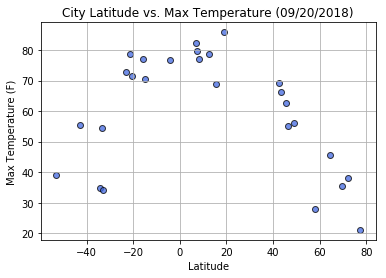

In [44]:
# Incorporate the graph properties    
plt.grid(True)
#plt.ylim(21,105)
#plt.xlim(-61,85)
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(clean_df['Lat'], clean_df['Max Temp'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)


#### Latitude vs. Humidity Plot

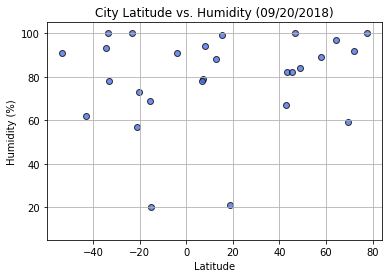

In [45]:
plt.grid(True)
plt.ylim(5,105)
#plt.xlim(-61,85)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(clean_df['Lat'], clean_df['Humidity'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)


#### Latitude vs. Cloudiness Plot

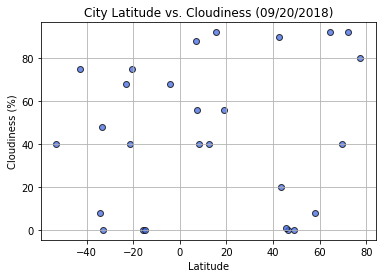

In [46]:
plt.grid(True)
#plt.ylim(21,105)
#plt.xlim(-61,85)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(clean_df['Lat'], clean_df['Cloudiness'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)


#### Latitude vs. Wind Speed Plot

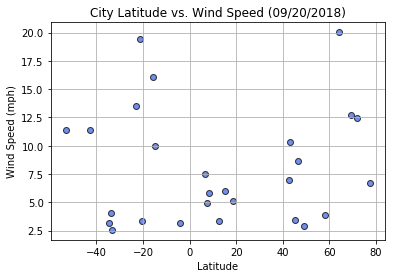

In [47]:
plt.grid(True)
#plt.ylim(21,105)
#plt.xlim(-61,85)
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(clean_df['Lat'], clean_df['Wind Speed'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
